# Problem Statement

Storm Motors is an e-commerce company who act as mediators between parties interested in selling and buying pre-owned cars.
 

For the year 2015-2016, they have recorded data about seller and car including-
* Specification details
* Condition of Car
* Seller details
* Registration details
* Web advertisement details
* Make and model information
* Price


Storm Motors wishes to develop a model to predict the price of the cars based on various attributes associated with the car.


In [1]:
#We will import necessary libraries to build the model.
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib as plt
%matplotlib inline

In [2]:
#Setting dimensions for plot
sns.set(rc ={'figure.figsize': (11.7, 8.27)})

Our data is stored in the file named 'cars_sampled.csv', we will now import our data.

In [2]:
#Reading CSV file
cars_data=pd.read_csv('cars_sampled.csv')

In [3]:
# Creating Copy
cars = cars_data.copy()
# It is a good idea to create and work with the copy of datafile and keep original data file intact.

In [5]:
#Structure of the dataset
cars.info() # This tells us about total columsn, no of data entries and data type of each columns
            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
dateCrawled            50001 non-null object
name                   50001 non-null object
seller                 50001 non-null object
offerType              50001 non-null object
price                  50001 non-null int64
abtest                 50001 non-null object
vehicleType            44813 non-null object
yearOfRegistration     50001 non-null int64
gearbox                47177 non-null object
powerPS                50001 non-null int64
model                  47243 non-null object
kilometer              50001 non-null int64
monthOfRegistration    50001 non-null int64
fuelType               45498 non-null object
brand                  50001 non-null object
notRepairedDamage      40285 non-null object
dateCreated            50001 non-null object
postalCode             50001 non-null int64
lastSeen               50001 non-null object
dtypes: int64(6), object(13)
memory usage:

Looking at above structure of the dataset, we observe that there are some missing values in 'vehicleType', 'gearbox', 'model', 'fuelType', 'notRepairedDamage' variables.

In [4]:
cars.shape

(50001, 19)

Our data has 19 columns (features) and 50001 rows.

# VARIABLE DESCRIPTION

### dateCrawled 
* DataType - date
* Description - date when the ad first crawled, all field values are taken from this date.

### name 
* DataType - string 
* Description - string consisiting of car name, brand, model etc.

### seller
* DataType - string
* Description - nature of seller (either private or commercial).

### offerType
* DataType - string
* Description - whether the car is on offer or has the buyer requested for an offer.

### price
* DataType - integer
* Description - price on the ad to sell the car ()

### abtest
* Datatype - string
* Description - two versions of ad (used for test, control)

### vehicleType
* Datatype - string
* Description - types of cars

### yearOfRegistration
* Datatype - integer
* Description - year in which car was first registered.

### gearbox
* Datatype - string
* Description - type of gearbox (either manual or automatic)

### powerPS
* Datatype - integer
* Description - power of the car (HP)

### model
* Datatype - string
* Description - model type of the car

### kilometer
* Datatype - integer
* Description - number of kilometres the car has travelled

### monthOfRegistration
* Datatype - integer (qualitative)
* Description - month of registration

### fuelType
* Datatype - string
* Description - types of fuel

### brand
* Datatype - string
* Description - maker of car

### notRepairedDamage
* Datatype - string
* Description - status of repair for damages. If yes - damages have not been rectified; If no - damages were taken care of.

### dateCreated
* Datatype - date
* Description - date at which the ad at storm motor was created.

### postalCode
* Datatype - integer
* Description - postal code of seller

### lastSeen
* Datatype - date
* Description - date when the crawler saw this ad last online.



In [10]:
cars.head(10)
# This gives us the glimpse of raw data, here first 10 rows of dataframe is shown. Default value of head method is 5.

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18
5,2/4/2016 12:51,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,988,test,limousine,1995,manual,90,passat,150000,2,petrol,volkswagen,no,2/4/2016 0:00,26826,2/4/2016 12:51
6,3/4/2016 11:06,Opel_astra,private,offer,400,test,station wagon,1996,manual,0,astra,150000,5,petrol,opel,NaN,3/4/2016 0:00,56422,6/4/2016 16:47
7,24/03/2016 15:52,Mercedes_Benz_CLK_Coupe_200,private,offer,1399,test,coupe,1997,manual,136,clk,150000,11,petrol,mercedes_benz,no,24/03/2016 0:00,13353,27/03/2016 12:45
8,28/03/2016 14:40,Vectra_C_Caravan_1_8_Edition_Facelift_m_AHK_In...,private,offer,4680,test,station wagon,2005,manual,122,vectra,150000,12,petrol,opel,no,28/03/2016 0:00,28307,6/4/2016 18:19
9,5/4/2016 11:38,Skoda_Octavia_2.0_TDI_DSG_Elegance,private,offer,8340,test,limousine,2005,automatic,140,octavia,125000,4,diesel,skoda,no,5/4/2016 0:00,16761,5/4/2016 11:38


### Our Target variable is 'price' as we want to predict the price of the car.

## Summarizing data

In [7]:
cars.describe() # This display the summary of only few variables and rest are replaced by dots
pd.set_option('display.float_format', lambda x: '%.3f' % x) # here %.3f is used to display numbers upto 3 decimal places only.
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [12]:
# To display maximum set of columns
pd.set_option('display.max_columns', 500) # 500 is the maximum no of columns we want to be displayed. 
# This feature will be useful when dealing with the large number of columns in data frame.
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


Dropping unwanted columns

In [5]:
col=['name', 'dateCrawled', 'dateCreated', 'postalCode', 'lastSeen']
cars = cars.drop(col, axis = 1) # We are dropping above mentioned variables as they are redundant for our problem.
# dateCrawled is the date when ad first crawled, all field values are taken from this date.
# dateCreated is the date at which the ad at storm motor was created.
# postalCode is postal code of Seller
# lastSeen tells when the crawler saw this ad last online

It is a good practice to remove unwanted columns as it will save us computational time and cost while building the model.

In [18]:
cars.head()

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no


In [6]:
cars.shape

(50001, 14)

We can see that columns have decreased from 19 to 14. Which means 5 columns are dropped.

## Remove duplicate Records

In [7]:
cars.drop_duplicates(keep = 'first',inplace = True) # inplace = True means that we will keep only one copy of duplicate 
# records

In [8]:
cars.shape

(49531, 14)

There were 470 duplicate records.

## DATA CLEANING

In [8]:
# No. of missing values in each column
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

### Variable 'yearofRegistration'

It is the year in which car was first registered.

In [36]:
yearwise_count = cars['yearOfRegistration'].value_counts().sort_index()
print(yearwise_count)

1000       6
1255       1
1500       2
1910      14
1928       1
1929       1
1933       1
1934       1
1936       2
1938       1
1940       1
1941       1
1943       2
1945       2
1947       2
1950       4
1951       4
1952       3
1953       2
1954       1
1955       6
1956       7
1957       5
1958       4
1959       5
1960      32
1961       7
1962       6
1963      11
1964      16
        ... 
2002    2554
2003    2731
2004    2597
2005    3101
2006    2660
2007    2347
2008    2186
2009    2010
2010    1643
2011    1544
2012    1235
2013     816
2014     623
2015     405
2016    1351
2017    1375
2018     528
2019       2
2222       1
2900       1
3000       1
3500       1
3800       1
5000       3
6000       4
7500       1
7800       1
8500       1
8888       2
9999       7
Name: yearOfRegistration, Length: 97, dtype: int64


In [32]:
sum(cars['yearOfRegistration'] > 2018)



26

In [31]:
sum(cars['yearOfRegistration'] < 1950)

38

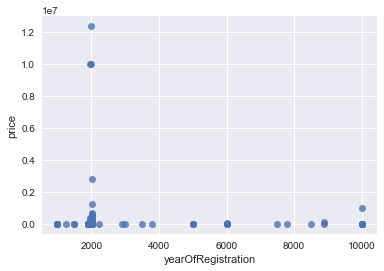

In [33]:
sns.regplot(x ='yearOfRegistration', y = 'price', scatter = True, 
            fit_reg = False, data = cars)

We will set the working range from 1950 - 2018 and get rid of cars with 'yearOfRegistration' outside this range as keeping them may damage the quality of our model because there are very few instances out of this range and they will act as outliers. Therefore, we should get rid of outliers.

### Variable 'Price' - Target Variable

In [37]:
price_count=cars['price'].value_counts().sort_index()
print(price_count)

0           1415
1            172
2              1
3              1
5              4
7              1
8              2
10             5
11             1
12             1
14             1
15             8
20             6
21             1
25             5
26             1
30             7
35             4
39             1
40             3
45             6
50            41
55             3
60             7
65             1
70             2
75             9
77             1
80            12
85             3
            ... 
163991         1
165000         1
169999         1
171000         1
175000         1
179999         1
189981         1
205000         1
214800         1
225000         1
230000         2
239000         1
249000         1
250000         1
257500         1
260000         1
270000         1
300000         1
370000         1
395000         1
485000         1
487000         1
619000         1
700000         1
999999         1
1250000        1
2795000        1
9999999       

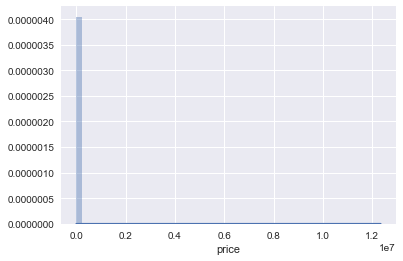

In [38]:
sns.distplot(cars['price'])

Nothing informative from distplot. 

In [39]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

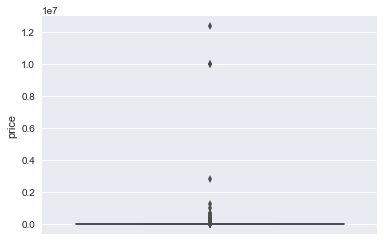

In [40]:
sns.boxplot(y=cars['price'])

This shows that there are considerable outliers in the data. We must get rid of them.

In [41]:
sum(cars['price'] > 150000)

34

In [42]:
sum(cars['price'] < 100)

1748

We will set working Range between 100 and 150000. Because the data outside this range is less and skewed, which will decrease the quality of our model as we want a generalized model.

### Variable 'powerPS'

In [43]:
power_count=cars['powerPS'].value_counts().sort_index()
print(power_count)

0        5533
1           3
2           2
3           2
4           4
5          17
6           2
7           1
9           1
10          2
11          4
12          6
13          1
14          6
15          3
16          1
18          9
19          2
20          1
22          1
23          3
24          5
26         46
27          5
29          2
30          7
31          1
32          2
33          5
34         29
         ... 
1223        1
1256        1
1363        1
1416        1
1502        1
1595        1
1598        1
1625        1
1653        1
1799        1
1910        1
1968        1
1992        1
1998        1
2004        1
2017        1
2172        1
2461        1
2789        1
6226        1
11620       1
12510       1
12512       1
12684       1
15017       1
15033       1
16011       1
16312       1
19211       1
19312       1
Name: powerPS, Length: 460, dtype: int64


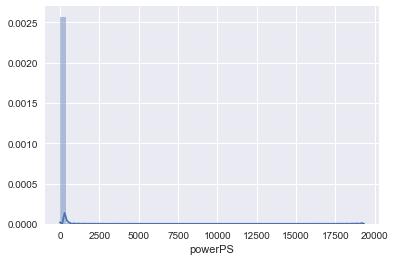

In [44]:
sns.distplot(cars['powerPS'])

In [45]:
cars['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

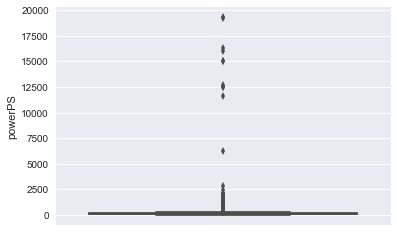

In [46]:
sns.boxplot(y=cars['powerPS'])

Boxplot shows that there are considerable outliers in the data. We must get rid of them.

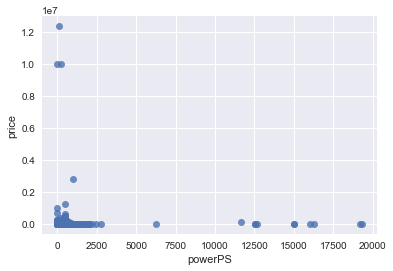

In [47]:
sns.regplot(x='powerPS', y='price', scatter =True,
            fit_reg=False, data=cars)

In [48]:
sum(cars['powerPS'] > 500)

115

In [49]:
sum(cars['powerPS'] < 10)

5565

Working range- 10 and 500

## WORKING RANGE OF DATA

In [9]:
cars = cars[
        (cars.yearOfRegistration <= 2018)
     &  (cars.yearOfRegistration >= 1950)
     &  (cars.price >= 100)
     &  (cars.price <= 150000)
     &  (cars.powerPS >= 10)
     &  (cars.powerPS <= 500)]

In [10]:
cars.shape

(42772, 14)

Oberve that 6700 records are dropped. We have refined our data which will help us in building a better model.

## Further simplification by variable reduction.

Combining yearofRegistration and monthofRegistration

In [11]:
cars['monthOfRegistration']/=12
cars.head()

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,0.250000,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,0.500000,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,0.916667,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,1.000000,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,0.916667,diesel,volvo,no


You can see that month of registration has been divided by 12 and is in float type now.

Creating new variable Age by adding yearOfRegistration and monthOfRegistration

In [12]:

cars['Age']=(2018-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2) # rounding off to two decimal places.
cars['Age'].describe()

count    42772.000000
mean        14.872642
std          7.093125
min          0.000000
25%         10.330000
50%         14.830000
75%         19.170000
max         67.750000
Name: Age, dtype: float64

Dropping yearOfRegistration and monthOfRegistration

In [13]:
cars=cars.drop(['yearOfRegistration','monthOfRegistration'], axis=1) # axis = 1 means we are dropping from columns.
cars.shape

(42772, 13)

# Visualizing parameters

### AGE

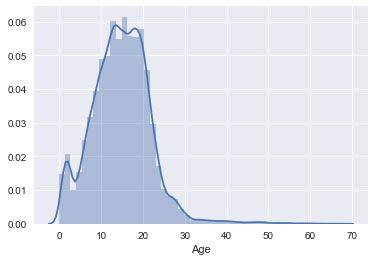

In [58]:
sns.distplot(cars['Age'])

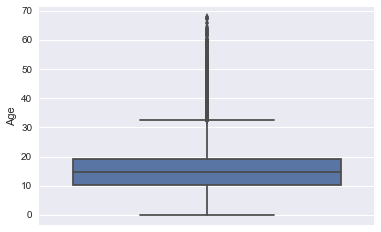

In [59]:
sns.boxplot(y=cars['Age'])

## price

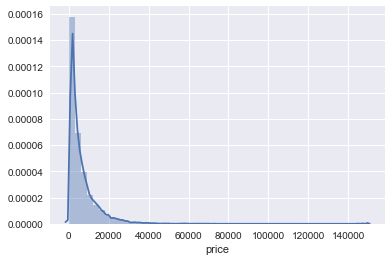

In [60]:
sns.distplot(cars['price'])

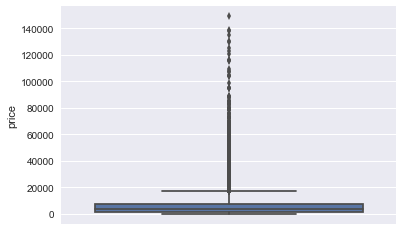

In [61]:
sns.boxplot(y=cars['price'])

 We still have few extreme values outside the whisker

## powerPS

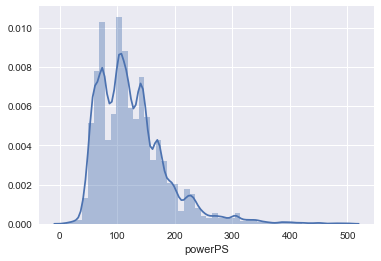

In [62]:
sns.distplot(cars['powerPS'])

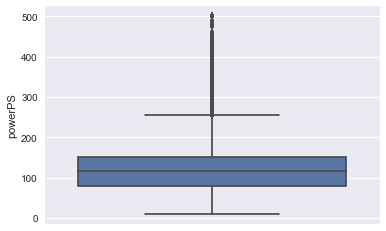

In [64]:
sns.boxplot(y=cars['powerPS'])

# We Visualised parameters after narrowing working range.
# Checking affect of parameters on Price.

## Age vs price

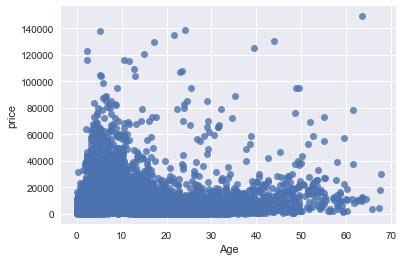

In [65]:
sns.regplot(x ='Age', y='price', scatter=True,
            fit_reg=False, data=cars)

## Observations - 
* Cars priced higher are newer
* With increase in age, price decreases
* However some cars are priced higher with increase in age. They can be Vintage Cars.

## powerPS vs price

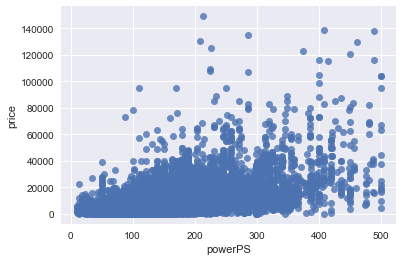

In [66]:
sns.regplot(x='powerPS', y='price', scatter = True,
            fit_reg=False, data=cars)

With increase in powerPS price eventually increases.


## Variable 'seller'

In [68]:
cars['seller'].value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

In [69]:
pd.crosstab(cars['seller'], columns='count',normalize=True)

col_0,count
seller,
commercial,0.000
private,1.000


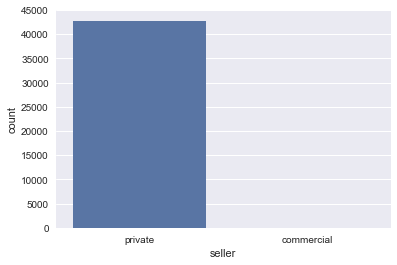

In [70]:
sns.countplot(x= 'seller', data=cars)

Fewer cars have 'commercial' seller. Hence, this is INSIGNIFICANT variable.

## Variable 'offerType'

In [71]:
cars['offerType'].value_counts()

offer    42772
Name: offerType, dtype: int64

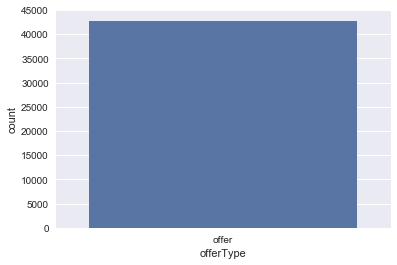

In [72]:
sns.countplot(x= 'offerType', data=cars)

* All cars have 'offer' => Insignificant variable.
* Excluded from further analysis of the data.

## Variable 'abtest'

In [73]:
cars['abtest'].value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

In [74]:
pd.crosstab(cars['abtest'],columns= 'count', normalize=True)

col_0,count
abtest,
control,0.483
test,0.517


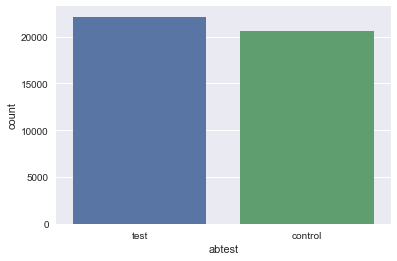

In [75]:
sns.countplot(x= 'abtest', data=cars)

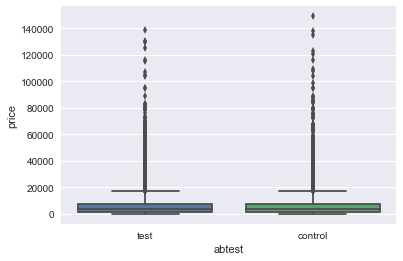

In [76]:
sns.boxplot(x ='abtest', y='price', data=cars)

* For every price value there is almost 50-50 distribution
* We can't really conclude anything from abtest, therefore it's insignificant as it doesn't affect price.
* Does not affect price => Insignificant variable

## Variable 'vehicleType'

In [77]:
cars['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

In [78]:
pd.crosstab(cars['vehicleType'], columns='count', normalize=True)


col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


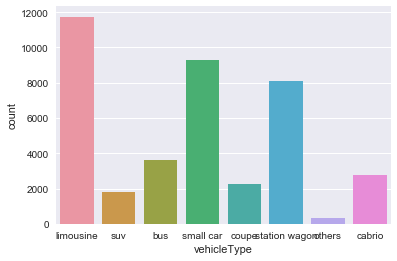

In [79]:
sns.countplot(x= 'vehicleType', data=cars)

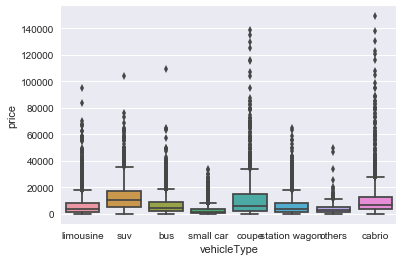

In [80]:
sns.boxplot(x = 'vehicleType', y= 'price', data=cars)

* Out of 8 types - Limousine, small cars and station wagons have maximum count.
* vehicleType affects frequency. We will consider this variable for building model.

## Variable 'gearbox'

In [81]:
cars['gearbox'].value_counts()

manual       32582
automatic     9396
Name: gearbox, dtype: int64

In [82]:
pd.crosstab(cars['gearbox'], columns='count',normalize=True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


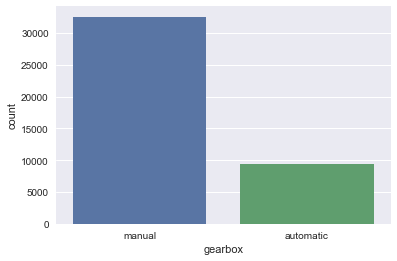

In [83]:
sns.countplot(x= 'gearbox',data=cars)

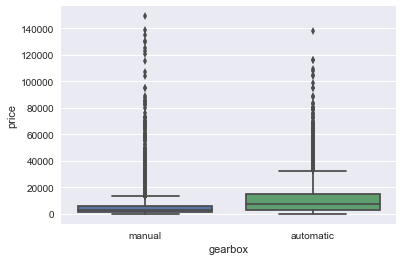

In [84]:
sns.boxplot(x= 'gearbox',y ='price', data=cars)

* gearbox affects price. 
* Manual prices are lower compared to automatic.
* We will consider this variable for building model.

## Variable 'model'

In [85]:
cars['model'].value_counts()

golf                  3478
others                2900
3er                   2482
polo                  1500
corsa                 1386
astra                 1276
a4                    1230
passat                1200
c_klasse              1042
5er                   1013
e_klasse               907
a3                     826
a6                     737
focus                  701
fiesta                 637
transporter            630
2_reihe                603
fortwo                 532
1er                    527
a_klasse               497
vectra                 491
twingo                 479
clio                   437
3_reihe                437
touran                 422
mondeo                 388
punto                  363
ibiza                  354
megane                 340
zafira                 325
                      ... 
v60                     10
kalos                   10
900                      9
nubira                   9
r19                      8
range_rover              8
c

In [86]:
pd.crosstab(cars['model'],columns='count', normalize=True)

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
1_reihe,0.004
1er,0.013
200,0.000
2_reihe,0.015


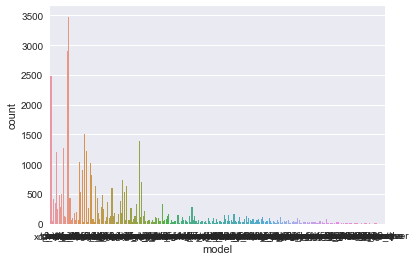

In [87]:
sns.countplot(x = 'model', data=cars)

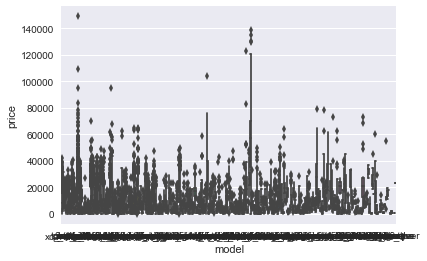

In [88]:
sns.boxplot(x= 'model', y = 'price', data=cars)

* Cars are distributed over many models.
* We will Consider this variable in modelling as we can vaguely see that different models have different price distribution.

## VARIABLE 'KILOMETER'

In [89]:
cars['kilometer'].value_counts().sort_index()

5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: kilometer, dtype: int64

In [90]:
pd.crosstab(cars['kilometer'],columns='count', normalize=True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


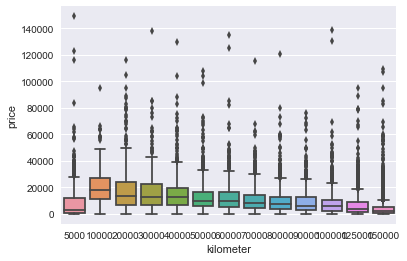

In [91]:
sns.boxplot(x= 'kilometer', y= 'price', data=cars)

In [92]:
cars['kilometer'].describe()

count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

Considered in modelling

## Variable 'fuel Type'

In [93]:
cars['fuelType'].value_counts()

petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64

In [94]:
pd.crosstab(cars['fuelType'], columns='count', normalize=True)

col_0,count
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


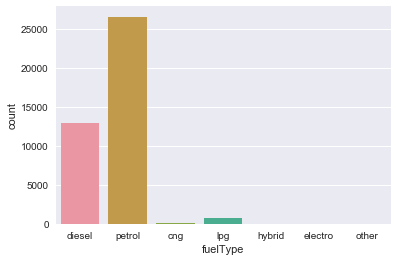

In [95]:
sns.countplot(x= 'fuelType', data=cars)

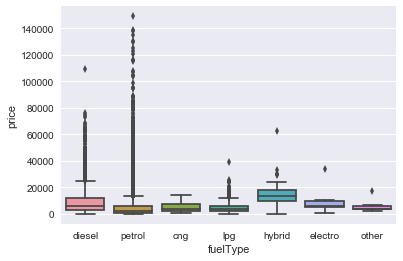

In [96]:
sns.boxplot(x = 'fuelType', y= 'price', data=cars)

 fuelType affects price, hence, considered in modelling.

## VARIABLE 'BRAND'

In [97]:
cars['brand'].value_counts()

volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
rover               53
daewoo              53
trabant             43
lada                22
Name: brand, dtype: int64

In [98]:
pd.crosstab(cars['brand'],columns='count', normalize=True)

col_0,count
brand,
alfa_romeo,0.006
audi,0.093
bmw,0.114
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


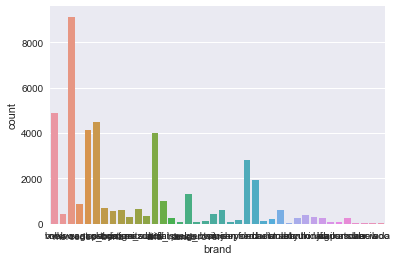

In [99]:
sns.countplot(x ='brand', data=cars)

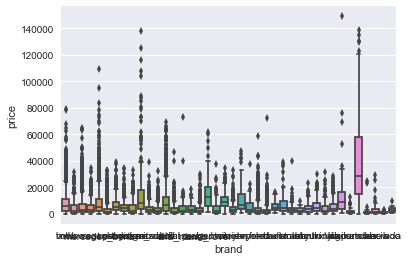

In [100]:
sns.boxplot(x ='brand', y='price',data = cars)

* Cars are distributed over many brands
* Considered for modelling

## Variable 'notRepairedDamage'

* yes- car is damaged but not rectified
* no- car was damaged but has been rectified

In [102]:
cars['notRepairedDamage'].value_counts()

no     32507
yes     3988
Name: notRepairedDamage, dtype: int64

In [103]:
pd.crosstab(cars['notRepairedDamage'], columns='count', normalize=True)

col_0,count
notRepairedDamage,
no,0.891
yes,0.109


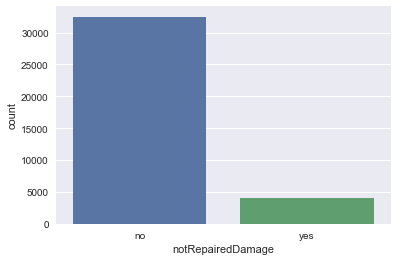

In [104]:
sns.countplot(x='notRepairedDamage', data=cars)

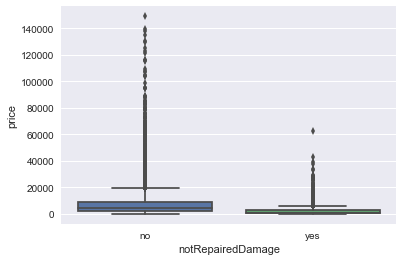

In [105]:
sns.boxplot(x= 'notRepairedDamage', y='price', data=cars)

As expected, the cars that requires the damages to be repaired fall under lower price ranges. Variable Considered for modelling

# REMOVING INSIGNIFICANT VARIABLES

In [14]:
col=['seller','offerType', 'abtest']
cars=cars.drop(col, axis=1)
cars_copy=cars.copy()
cars_copy.shape

(42772, 10)

### cars_copy is copy of the final cleaned data on which we will build, train and test our model. It has 10 features with 42772 rows.

# CORRELATION

In [110]:
cars_select1=cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()
round(correlation,3)



,price,powerPS,kilometer,Age
price,1.000,0.575,-0.440,-0.336
powerPS,0.575,1.000,-0.016,-0.151
kilometer,-0.440,-0.016,1.000,0.292
Age,-0.336,-0.151,0.292,1.000


In [109]:
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]


powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

Only powerPS shows reasonable correlation with price.

We used this method to check if there is any high correlation of these variables with 'price'. If yes, then there can be a chance of Data Leakage by that feature. 

# We are going to build a Linear Regression and Random Forest model on two sets of data.
## 1. Data obtained by omitting rows with any missing values
## 2. Data obtained by imputing the missing values.


## OMITTING MISSING VALUES

In [15]:
cars_omit = cars.dropna(axis=0)  # This is the command we use to drop rows with any missing (NaN) value.


In [16]:
cars_omit.shape 

(32884, 10)

You can see that number of rows are dropped from 50001 to 32884.

In [17]:
cars_omit=pd.get_dummies(cars_omit,drop_first=True) # here everything will convert into 0 and 1
cars_omit.shape

(32884, 301)

Observe that number of columns changed from 10 to 301 as we made new columns out of categorical variable. 

In [19]:
cars_omit.head()

,price,powerPS,kilometer,Age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,...,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
1,13299,163,150000,13.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4500,86,60000,13.00,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,18750,185,150000,10.92,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,988,90,150000,23.17,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,1399,136,150000,21.92,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## IMPORTING NECESSARY LIBRARIES

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## MODEL BUILDING WITH OMITTED DATA

Seperating input and output features

In [19]:

x1 = cars_omit.drop(['price'], axis='columns', inplace=False) #Collection of input features
y1 = cars_omit['price'] #Output feature
# inplace = False implies we don't want the change to be reflected in original cars_omit dataframe.

In [20]:
x1.shape, y1.shape

((32884, 300), (32884,))

Plotting the Variable Price

In [28]:
prices = pd.DataFrame({"1. Before":y1, "2.After":np.log(y1)})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0df8f320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a0a74e160>]], dtype=object)

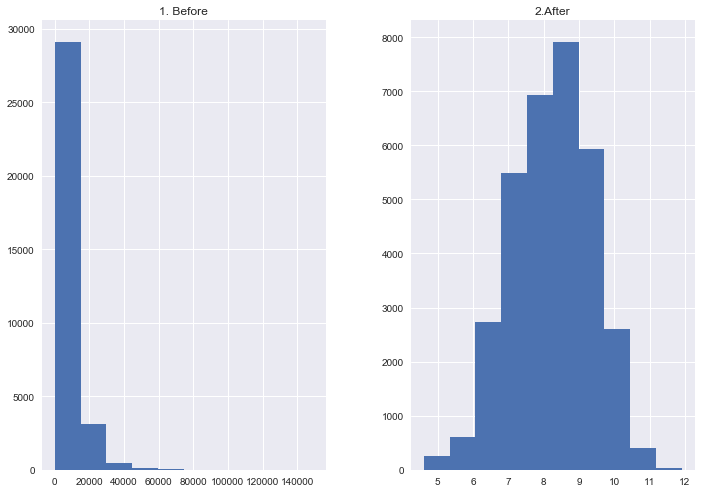

In [29]:
prices.hist()

This shows the reason for using log(y1). Left hand side graph is more skewed whereas right hand side gives a bell shaped curve. Therefore it is a good idea to scale the target variable with logarithmic scale. ALso, the range of price is very huge, so to get price more closer, we are using the log scale.

 Transforming price as a logarithmic value

In [21]:
y1 = np.log(y1)

Splitting data into test and train

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3) 
# Defining fixed random state means everytime we run this model, the same set of records will go to train and test.
# Random state is a predefined algoritm, also referred as pseudo random generator.

In [23]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


 Roughly 70% data is in training.

## BASELINE MODEL FOR OMITTED DATA

We are making a base model by using test data mean value.
This is to set a benchmark and to compare with our regression model. This is also called as Dummy Regressor. It is an important practice to always make a dummy regressor to set up a benchmark evaluation score.

In [26]:
# finding the mean for test data value
base_pred = np.mean(y_test)
print(base_pred)

8.249615787653337


In [27]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test))

In [28]:
#finding the RMSE
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
print(base_root_mean_square_error)
# RMSE is our evaluation metric.

1.12744836575


Here, our Dummy Regressor predicted mean value of y_test to all the predictions. Then we calculated the root_mean_square_error and it is 1.12744836575. This is our benchmark error, and the model we will build should definitely give less than this error and perform better than this baseline model.

# LINEAR REGRESSION WITH OMITTED DATA

A Linear Regression model is a sum of weighted variables that predicts a target output value given an input data instance.

In [30]:
# Setting Intercept as True
lgr=LinearRegression(fit_intercept=True)

Model

In [31]:
model_lin1=lgr.fit(X_train, y_train)

Predicting model on test set

In [32]:
cars_predictions_lin1 = lgr.predict(X_test)

### Computing RMSE

In [33]:

lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.545548126651


We can see that Root Mean Squared Error (RMSE) by this model is lower than the baseline model, which clearly indicates that our model's performance is better than the Baseline Model.

### R squared value
This is another metric for evaluation. Also called R squared Regression Score. Measures how well a prediction model for regression fits the given data.
The Score is between 0 and 1. 
A value of 1 corresponds to perfect prediction. 
A value of 0 corresponds to a constant model that predicts the mean value (or some other constant value) of all training values as target values.
A value of 0.9 (for example) means that 90% of variation in y data is due to the variation in x data.

In [42]:
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
print(r2_lin_train1,r2_lin_test1)


0.780093697818 0.765861509165


### Regression diagnostics- Residual plot analysis
Residual is the difference between your test data and predicted data.

count    9866.000000
mean        0.003352
std         0.545565
min        -5.796435
25%        -0.260941
50%         0.041057
75%         0.301637
max         4.547147
Name: price, dtype: float64

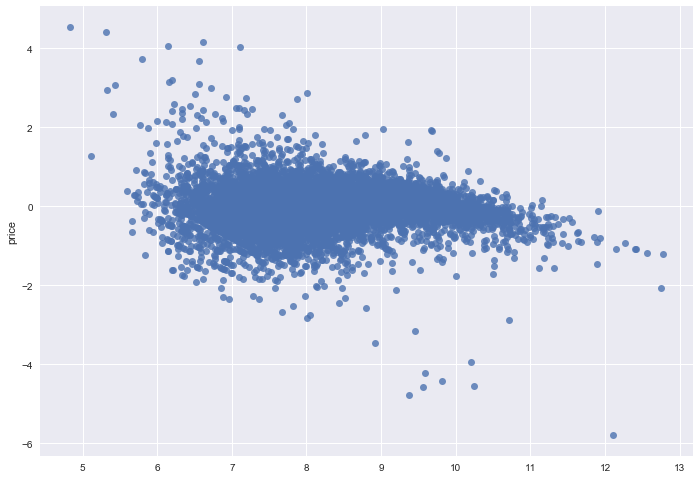

In [43]:
residuals1 =y_test-cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1, y=residuals1, scatter=True, 
            fit_reg=False, data=cars)
residuals1.describe()

We can see from figure that most of our data points are close to 0 and from the residuals1 description we observe that the mean is 0.003352 which is quite less and the standard deviation is also not much, which implies that our model is good.

# RANDOM FOREST WITH OMITTED DATA

* Random Forest are an Ensemble of decision trees, not just one tree.
* These are widely used, give very good results on many problems.
* Ensembling of trees reduces the risk of overfitting by averaging out the individual mistakes made by tree.
* For more information about Random Forest and it's paramters read - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [24]:
# Model Parameters
rf = RandomForestRegressor(n_estimators = 100, max_features='auto',
                           max_depth=100,min_samples_split=10,
                            min_samples_leaf=4,random_state=1)

 Model

In [25]:
model_rf1=rf.fit(X_train,y_train)

Predicting model on test set

In [36]:
cars_predictions_rf1 = rf.predict(X_test)

### Computing MSE and RMSE

In [37]:
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.436073731963


We can observe that Random Forest Regressor is performing better than Linear Regression as it has less RMS Error.

### R squared value

In [26]:
r2_rf_test1=model_rf1.score(X_test,y_test)
r2_rf_train1=model_rf1.score(X_train,y_train)
print(r2_rf_train1,r2_rf_test1)

0.920249470515 0.850401744088


We can observe that Random Forest Regressor is performing better than Linear Regression as it more R squared value.

## We will perform a RandomizedSearchCV for hyperparameter tuning to get the best parameters for Random Forest regressor in order to get maximum score.

# RandomizedSearchCV

* RandomizedSearchCV performs search on hyper parameters specified by user. The parameters of the estimator are optimized by Cross-validation search over all parameters. 
* Cross-validation uses multiple train-test splits, not just a single one. Each split is used to train & evaluate a separate model. Results are averaged over multiple different training sets instead of relying on a single model trained on a particular training set. This gives more stable and reliable estimates for how the model is likely to perform on average.
* For more details on RandomizedSearchCV follow this link:-
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [44]:
rf = RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
           'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_ , rf_random.best_score_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=False 
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=False 
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=False 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=False, total= 1.8min
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=False, total=33.6min
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=100, bo

[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=False, total=24.3min


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 79.7min


[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total= 1.2min
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total= 1.2min
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total= 1.1min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total= 5.9min
[CV] n_estimators=200

[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total= 2.1min
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=8, max_features=auto, max_depth=None, bootstrap=False, total=16.1min
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=8, max_features=auto, max_depth=None, bootstrap=False, total=16.5min
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=8, max_features=auto, max_depth=None, bootstrap=False, total=16.3min
[CV] n_estimat

[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total= 1.1min
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=False, total= 2.5min
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=False, total= 2.8min
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False, total=58.6min
[CV] n_estimato

[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=  20.1s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=False, total=13.6min
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=  19.5s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=  19.8s
[CV] n_estimators=1200, mi

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 475.4min


[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, total=  46.6s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, total=  47.1s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=False, total=13.3min
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=False, total=13.0min
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=1600

[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total= 2.3min
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, total=  30.2s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, total=  29.9s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total= 3.1min
[CV] n_estimators=100

[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=8, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False, total= 3.1min
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=8, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=8, max_features=sqrt, max_depth=20, bootstrap=True, total=  46.1s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=8, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=8, max_features=sqrt, max_depth=20, bootstrap=True, total=  45.2s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True, total= 6.0min
[CV] n_estimators=800, mi

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total= 1.2min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total= 5.0min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total= 1.1min
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total= 1.1min
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=600

[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total= 1.5min
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total= 1.5min
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False, total= 5.3min
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False, total= 5.1min
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=2000, 

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 625.5min finished


{'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': True} 0.859778087521


* This is the best model parameter we got after compuatationally expensive RandomizedSearchCV - {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': True}  
* Test Score - 0.859778087521.


# Best RandomForestRegressor Model

In [29]:
rf2 = RandomForestRegressor(n_estimators=800, min_samples_split=10, min_samples_leaf=1,
                            max_features='auto', max_depth=60, bootstrap=True)
best_model = rf2.fit(X_train, y_train)
# r2_rf2_test1=model_rf2.score(X_test,y_test)
# r2_rf2_train1=model_rf2.score(X_train,y_train)
# print(r2_rf2_train1,r2_rf2_test1)


In [28]:
r2_rf2_test1= best_model.score(X_test,y_test)
r2_rf2_train1= best_model.score(X_train,y_train)
print(r2_rf2_train1,r2_rf2_test1)

0.947891669133 0.855302828974


### We can observe that best rf model gives train and test score as 0.947891669133 , 0.855302828974 respectively, having better score than the rf model we trained previously having train and test score as 0.920249470515, 0.850401744088 respectively.

# MODEL BUILDING WITH IMPUTED DATA

In [31]:
cars_imputed = cars.apply(lambda x:x.fillna(x.median()) \
                          if x.dtype=='float' else\
                          x.fillna(x.value_counts().index[0]))

Here we are filling the nan values with median value if column has float datatype values, for other columns it will fill the value which is most frequent.

In [50]:
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [32]:
# Converting categorical variables to dummy variables
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True)


In [33]:
cars_imputed.shape

(42772, 304)

In [34]:
# Seperating input and output feature
x2 = cars_imputed.drop(['price'], axis='columns', inplace=False)
y2 = cars_imputed['price']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a265cbd30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a26741940>]], dtype=object)

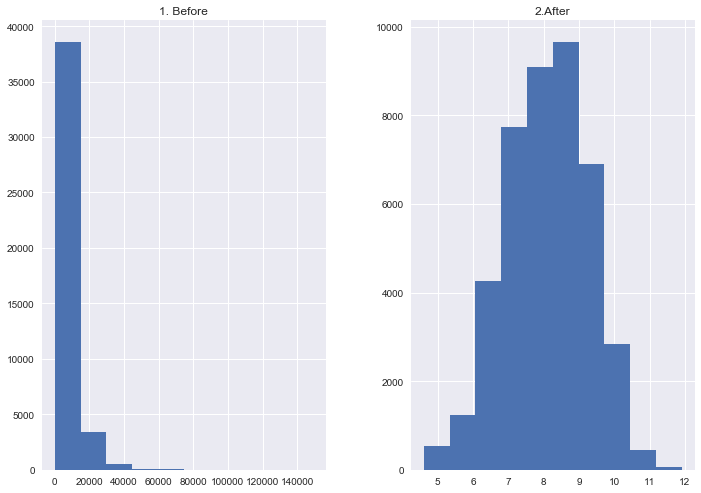

In [54]:
# Plotting the variable price
prices =pd.DataFrame({"1. Before":y2, "2.After":np.log(y2)})
prices.hist()

In [35]:
# Transforming price as a logarithmic value
y2 = np.log(y2)

In [36]:
# Splitting data into test and train
X_train1, X_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size=0.3, random_state =3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


# BASELINE MODEL FOR IMPUTED DATA

We are making a base model by using test data mean value.
This is to set a benchmark and to compare with our regression model

In [57]:
# finding the mean for test data value
base_pred = np.mean(y_test1)
print(base_pred)

8.068391740519193


In [58]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test1))


### Finding the RMSE

In [59]:
base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(y_test1, base_pred)) 
print(base_root_mean_square_error_imputed)

1.18843491129


# LINEAR REGRESSION WITH IMPUTED DATA

In [60]:
# Setting intercept as true
lgr2 = LinearRegression(fit_intercept=True)

 Model

In [61]:
model_lin2=lgr2.fit(X_train1, y_train1)

In [62]:
# Predicting model on test set
cars_predictions_lin2 = lgr2.predict(X_test1)

### Computing MSE and RMSE

In [63]:
lin_mse2 = mean_squared_error(y_test1, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)

0.648395644923


This is not better than linear regression in omitted data as there the error value was 0.545548126651 which is less than this (0.648395644923) error value.

### R squared value

In [64]:
r2_lin_test2=model_lin2.score(X_test1,y_test1)
r2_lin_train2=model_lin2.score(X_train1,y_train1)
print(r2_lin_test2,r2_lin_train2)

0.702333900863 0.707165873689


# RANDOM FOREST WITH IMPUTED DATA

In [65]:
# Model parameters
rf2 = RandomForestRegressor(n_estimators = 100, max_features='auto',
                           max_depth=100,min_samples_split=10,
                            min_samples_leaf=4,random_state=1)

Model

In [66]:
model_rf2=rf2.fit(X_train1,y_train1)

In [67]:
# Predicting model on test set
cars_predictions_rf2 = rf2.predict(X_test1)


### Computing MSE and RMSE

In [68]:
rf_mse2 = mean_squared_error(y_test1, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2) #This is good value compared to linear regressor on imputed data 

0.494314185335


### R squared value

In [69]:
r2_rf_test2=model_rf2.score(X_test1,y_test1)
r2_rf_train2=model_rf2.score(X_train1,y_train1)
print(r2_rf_test2,r2_rf_train2)

0.826996318487 0.902428532073


# FINAL OUTPUT

In [70]:
print("Metrics for models built from data where missing values were omitted")
print(" R squared value for train from Linear Regression= %s"% r2_lin_train1)
print(" R squared value for test from Linear Regression= %s"% r2_lin_test1)
print(" R squared value for train from Random Forest= %s"% r2_rf_train1)
print(" R squared value for test from Random Forest= %s"% r2_rf_test1)

Metrics for models built from data where missing values were omitted
 R squared value for train from Linear Regression= 0.780093697818
 R squared value for test from Linear Regression= 0.765861509165
 R squared value for train from Random Forest= 0.920249470515
 R squared value for train from Random Forest= 0.850401744088


In [71]:
print("Metrics for models built from data where missing values were imputed")
print(" R squared value for train from Linear Regression= %s"% r2_lin_train2)
print(" R squared value for test from Linear Regression= %s"% r2_lin_test2)
print(" R squared value for train from Random Forest= %s"% r2_rf_train2)
print(" R squared value for test from Random Forest= %s"% r2_rf_test2)

Metrics for models built from data where missing values were imputed
 R squared value for train from Linear Regression= 0.707165873689
 R squared value for test from Linear Regression= 0.702333900863
 R squared value for train from Random Forest= 0.902428532073
 R squared value for train from Random Forest= 0.826996318487


It is important to impute values as we don't want to let go any information. However, there may be a tradeoff between the prediction quality of the model when we impute data. Therefore, it is necessary to carefully impute the data.

### By looking at the evaluation metrics score it is clear that Random Forest Regressor is performing better than the Linear Regression model.

# Fitting Best RandomForest Regressor Model in imputed data.

In [37]:
rf3 = RandomForestRegressor(n_estimators=800, min_samples_split=10, min_samples_leaf=1,
                            max_features='auto', max_depth=60, bootstrap=True)
best_model1 = rf3.fit(X_train1, y_train1)
r2_rf3_test1=best_model1.score(X_test1,y_test1)
r2_rf3_train1= best_model1.score(X_train1,y_train1)
print(r2_rf3_train1,r2_rf3_test1)


0.9362424036 0.83096145044


### We can observe that best rf model gives train and test score as 0.9362424036, 0.83096145044 respectively, having better score than the rf model we trained previously having train and test score as 0.902428532073, 0.826996318487 respectively.

## CHANCE OF DATA LEAKAGE ?

Data Leakage occurs when the data you're using to train contains information about what you're trying to predict.
When we used the median to impute nan values, we took the median of whole dataset, which means we are taking into account the information of test dataset in training dataset, this may lead to overperfomance of our model as it got some information about the target dataset which it wants to predict (which is supposed to be unseen for the model).

Hence, to avoid any chances of Data Leakage we will first split the dataset into train and test, and then fill the missing values of training dataset with median of training dataset, and fill the missing value of test dataset with median of test dataset. Like this we will avoid the leakage of information from test to train dataset, which will give a better generalizability to our model when it is deployed.

In [42]:
cars1 = pd.get_dummies(cars,drop_first=True)
cars1.shape

(42772, 304)

In [43]:
x3 = cars1.drop(['price'], axis='columns', inplace=False)
y3 = cars1['price']


In [44]:
y3 = np.log(y3) # We can do this before split since there are no missing values in price.

In [45]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x3, y3, test_size=0.3, random_state =3)
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


## Now we will fill missing values seperately in X_train and X_test to avoid data leakage.

In [46]:
X_train3 = X_train2.apply(lambda x:x.fillna(x.median()) \
                          if x.dtype=='float' else\
                          x.fillna(x.value_counts().index[0]))
X_test3 = X_test2.apply(lambda x:x.fillna(x.median()) \
                          if x.dtype=='float' else\
                          x.fillna(x.value_counts().index[0]))

We will run the best Random Forest Regressor Model Now and will compare the result score with the Best Random Forest Regressor model built on Imputed data.

In [47]:
rf4 = RandomForestRegressor(n_estimators=800, min_samples_split=10, min_samples_leaf=1,
                            max_features='auto', max_depth=60, bootstrap=True)
best_model2 = rf4.fit(X_train3, y_train2)
r2_rf4_test1=best_model2.score(X_test3,y_test2)
r2_rf4_train1= best_model2.score(X_train2,y_train2)
print(r2_rf4_train1,r2_rf4_test1)

0.936534014286 0.830582267201


### We can observe that there is not much change (0.936534014286, 0.830582267201) in the scores as compared to the model with risk of Data Leakage (0.9362424036, 0.83096145044). 

## Hence, it implies that there is almost no data leakage in our model. However, in other datasets data leakage can be problem, therefore we must follow the proper steps while imputing missing data as we described and performed above. 

# CONCLUSION

Hence, we build the model to predict car prices on Omitted as well as imputed data by making use of the sophisticated Machine Learning algorithm like Random Forests, Performing extensive Exploratory Data Analysis and using the advanced Hyperparamter tuning methods in form of RandomizedSearchCV, also taking care of Data Leakage Problems. 

# END OF PROJECT

This Project is a little more modified and advanced version of the project which is part of NPTEL Course 'Python for DataScience' by Prof. Raghunathan Rengasamy from IIT MADRAS. I thank him for his guidance in my DataScience journey. 